In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# DATA overview


Overview
The data has been split into two groups:

training set (train.csv)
test set (test.csv)
The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

# Data Dictionary
### Variable	Definition	Key
survival =	Survival	0 = No, 1 = Yes
pclass =	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex =	Sex	
Age =	Age in years	
sibsp =	# of siblings / spouses aboard the Titanic	
parch =	# of parents / children aboard the Titanic	
ticket =	Ticket number	
fare =	Passenger fare	
cabin =	Cabin number	
embarked =	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [4]:
df.T.head()

,0,1,2,3,4,5,6,7,8,9,...,881,882,883,884,885,886,887,888,889,890
PassengerId,1,2,3,4,5,6,7,8,9,10,...,882,883,884,885,886,887,888,889,890,891
Survived,0,1,1,1,0,0,0,0,1,1,...,0,0,0,0,0,0,1,0,1,0
Pclass,3,1,3,1,3,3,1,3,3,2,...,3,3,2,3,3,2,1,3,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry","Moran, Mr. James","McCarthy, Mr. Timothy J","Palsson, Master. Gosta Leonard","Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)","Nasser, Mrs. Nicholas (Adele Achem)",...,"Markun, Mr. Johann","Dahlberg, Miss. Gerda Ulrika","Banfield, Mr. Frederick James","Sutehall, Mr. Henry Jr","Rice, Mrs. William (Margaret Norton)","Montvila, Rev. Juozas","Graham, Miss. Margaret Edith","Johnston, Miss. Catherine Helen ""Carrie""","Behr, Mr. Karl Howell","Dooley, Mr. Patrick"
Sex,male,female,female,female,male,male,male,male,female,female,...,male,female,male,male,female,male,female,female,male,male


In [5]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
pd.crosstab(df["Survived"], df["Age"])

Age,0.42,0.67,0.75,0.83,0.92,1.00,2.00,3.00,4.00,5.00,...,62.00,63.00,64.00,65.00,66.00,70.00,70.50,71.00,74.00,80.00
Survived,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,2,7,1,3,0,...,2,0,2,3,1,2,1,2,1,0
1,1,1,2,2,1,5,3,5,7,4,...,2,2,0,0,0,0,0,0,0,1


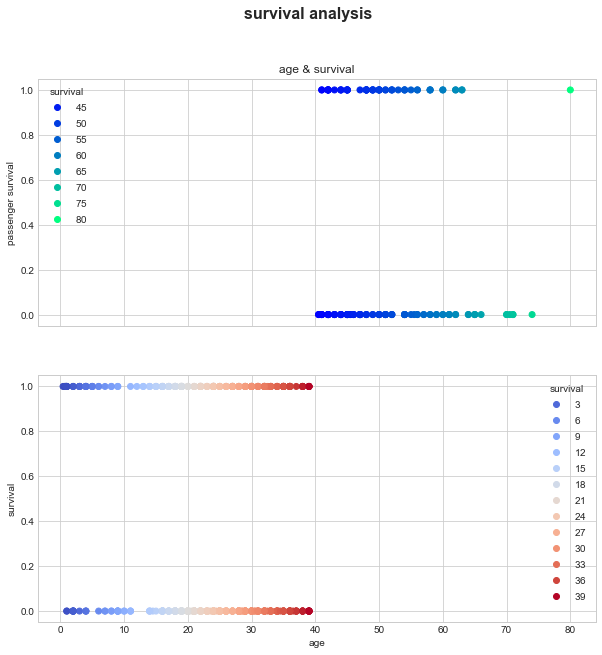

In [9]:
%matplotlib inline

age_above_40 = df[df["Age"]>40]
age_below_40 = df[df["Age"]<40]

plt.style.use("seaborn-whitegrid")

fig, (ax0, ax1) = plt.subplots(nrows=2,
                               ncols=1,
                               figsize=(10, 10),
                               sharex=True)
#scatter plot for age above 40

scatter = ax0.scatter(x = age_above_40["Age"],
                      y = age_above_40["Survived"],
                      c = age_above_40["Age"],
                      cmap="winter")

ax0.set(title="age & survival",
        ylabel = "passenger survival",
        )



ax0.legend(*scatter.legend_elements(), title="survival")

#scatter plot for age below 40

scatter = ax1.scatter(x = age_below_40["Age"],
                      y = age_below_40["Survived"],
                      c = age_below_40["Age"],
                      cmap = "coolwarm")

ax1.set(ylabel = "survival",
        xlabel = "age")

ax1.legend(*scatter.legend_elements(), title = "survival")

fig.suptitle("survival analysis", fontsize = "16", fontweight = "bold");


In [10]:
age_above_40 = df[df["Age"]>40]
age_above_40.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
35,36,0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,113789,52.0000,NaN,S


## 2.Data exploration

### draw graph 
1.Sex - Survived<br>
2.Pclass - Survived<br>
3.Embarked - Survived<br>
4.SibSp - Survived<br>
5.Parch - Survived<br>
6.Age - Survived<br>
7.Fare - Survived<br>

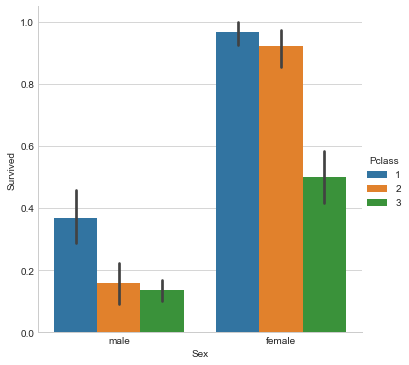

In [11]:
#sex - survival
sns.catplot(x = "Sex", y ="Survived", hue = "Pclass", kind="bar", data = df)
plt.show()

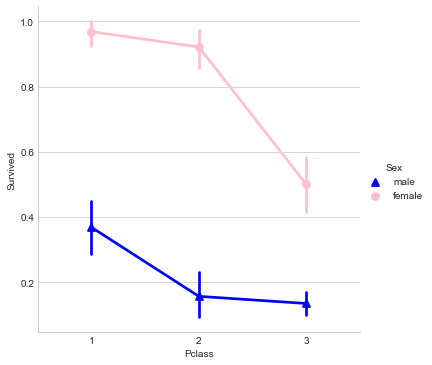

In [12]:
#pclass and survived
sns.catplot(x="Pclass", y="Survived", hue="Sex",
            palette = {"male":"b","female":"pink"},
            markers = ["^","o"], linestyle=["--", "-"],
            kind="point", data=df, legend=True)
plt.show()

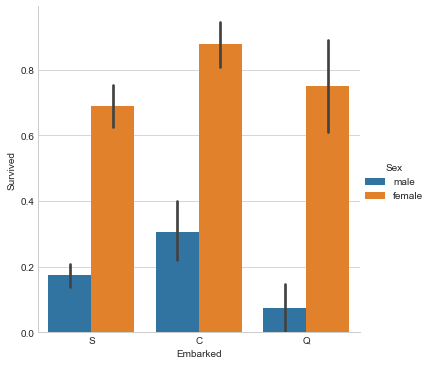

In [13]:
#embarked-survived
sns.catplot(x="Embarked", y="Survived", hue="Sex",
           kind="bar", data=df);

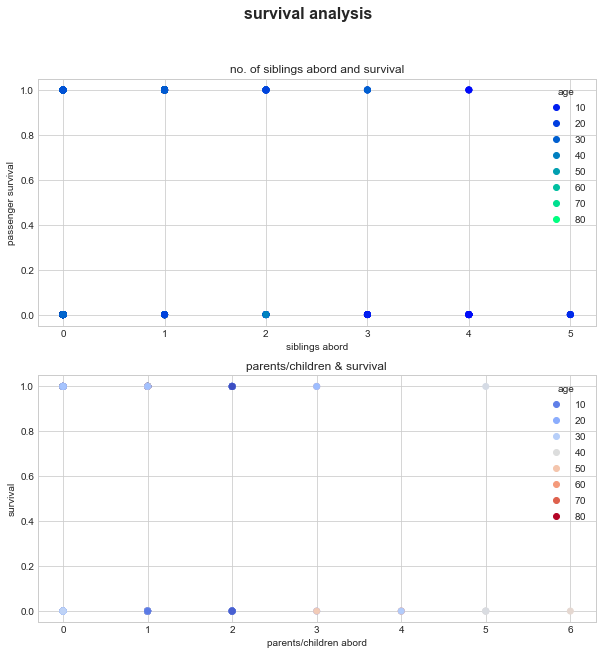

In [14]:
#siblings abord - survived

plt.style.use("seaborn-whitegrid")

fig, (ax0, ax1) = plt.subplots(nrows=2,
                               ncols=1,
                               figsize=(10, 10))

scatter = ax0.scatter(x = df["SibSp"],
                      y = df["Survived"],
                      c = df["Age"],
                      cmap="winter")

ax0.set(title="no. of siblings abord and survival",
        ylabel = "passenger survival",
        xlabel = "siblings abord"
        )



ax0.legend(*scatter.legend_elements(), title="age")

#scatter plot for age below 40

scatter = ax1.scatter(x = df["Parch"],
                      y = df["Survived"],
                      c = df["Age"],
                      cmap = "coolwarm")

ax1.set(title = "parents/children & survival",
        ylabel = "survival",
        xlabel = "parents/children abord")

ax1.legend(*scatter.legend_elements(), title = "age")

fig.suptitle("survival analysis", fontsize = "16", fontweight = "bold");


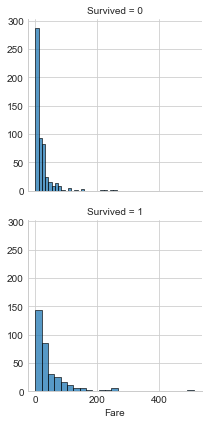

In [15]:
#fare - survival
g = sns.FacetGrid(df, row="Survived")
g.map(sns.histplot, "Fare", bins=25)
plt.show()

## corelational matrix

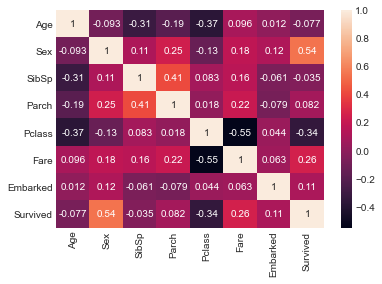

In [16]:
#data["Sex"] = [0 if i == "male" else 1 for i in data["Sex"]]
df['Sex'].replace(['male','female'],[0,1],inplace=True)
df['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
# male: 0, famela: 1
sns.heatmap(df[["Age","Sex","SibSp","Parch","Pclass","Fare","Embarked", "Survived"]].corr(), annot = True)
plt.show()


# missing values
find & fill missing values

In [17]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
df.columns[df.isnull().any()]

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

In [19]:
df[df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked



## fill age

In [20]:
def neglect_warning():
    import warnings
    warnings.filterwarnings("ignore")
    

In [21]:
neglect_warning()

data_age_nan_index = df[df["Age"].isnull()].index
for i in data_age_nan_index:
    mean_age = df["Age"][(df["Pclass"]==df.iloc[i]["Pclass"])].median()
    df["Age"].iloc[i] = mean_age

## fill embarked

In [22]:
df["Embarked"] = df["Embarked"].fillna(1)

# DATA ENGINEER 


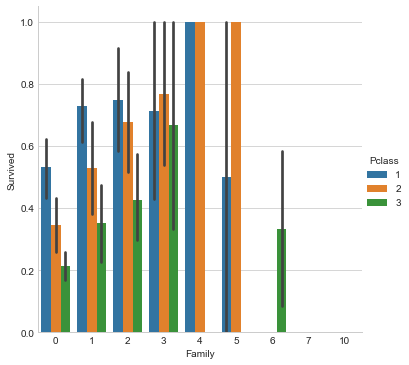

In [23]:
#alone and families
#family = sibsp + parch
df["Family"] = df["SibSp"] + df["Parch"]
sns.catplot(x = "Family", y = "Survived", hue="Pclass", data=df, kind="bar");

In [24]:
df["Alone"] = [1 if i == 0 else 0 for i in df["Family"]]
df["Family"].replace([0,1,2,3,4,5,6,7,10],[0,1,1,1,0,2,0,2,2], inplace = True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Alone
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0.0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0.0,1,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0.0,0,1


In [25]:
df["Title"] = df.Name.str.extract('([A-Za-z]+)\.')

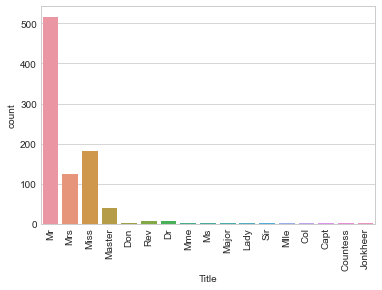

In [26]:
sns.countplot(df["Title"])
plt.xticks(rotation=90)
plt.show()

In [27]:
df['Title'].replace(['Mme','Ms','Mlle','Lady','Countess','Dona','Dr','Major','Sir','Capt','Don','Rev','Col', 'Jonkheer'],['Miss','Miss','Miss','Mrs','Mrs','Mrs','Mr','Mr','Mr','Mr','Mr','Other','Other','Other'], inplace=True)

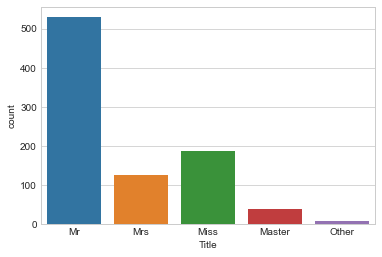

In [28]:
sns.countplot(df["Title"])
plt.show()

In [29]:
df["Title"].replace(["Mr", "Mrs", "Miss", "Master", "Other"],[1, 0, 0, 1, 2],inplace=True)

In [30]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Alone,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0.0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0.0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0.0,0,1,1


In [31]:
df.drop(labels=["SibSp", "Parch", "Fare", "Name", "PassengerId", "Cabin", "Ticket"], axis=1, inplace=True)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   Embarked  891 non-null    float64
 5   Family    891 non-null    int64  
 6   Alone     891 non-null    int64  
 7   Title     891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [33]:
df["Age"] = df["Age"].astype(int)
df["Embarked"] = df["Embarked"].astype(int)

In [34]:
df.head()

,Survived,Pclass,Sex,Age,Embarked,Family,Alone,Title
0,0,3,0,22,0,1,0,1
1,1,1,1,38,1,1,0,0
2,1,3,1,26,0,0,1,0
3,1,1,1,35,0,1,0,0
4,0,3,0,35,0,0,1,1


In [35]:
df["Age_limit"] = pd.cut(df["Age"], 5)
df.groupby(["Age_limit"])["Survived"].mean().to_frame().style.background_gradient(cmap="summer")

,Survived
Age_limit,
"(-0.08, 16.0]",0.550000
"(16.0, 32.0]",0.337374
"(32.0, 48.0]",0.412037
"(48.0, 64.0]",0.434783
"(64.0, 80.0]",0.090909


In [36]:
df["Age_limit"] = LabelEncoder().fit_transform(df["Age_limit"])
df.head()

,Survived,Pclass,Sex,Age,Embarked,Family,Alone,Title,Age_limit
0,0,3,0,22,0,1,0,1,1
1,1,1,1,38,1,1,0,0,2
2,1,3,1,26,0,0,1,0,1
3,1,1,1,35,0,1,0,0,2
4,0,3,0,35,0,0,1,1,2


In [37]:
df.drop(["Age"], axis=1, inplace=True)

# one hot encording

In [38]:
df = pd.get_dummies(df, columns=["Pclass"])
df = pd.get_dummies(df, columns=["Embarked"])
df = pd.get_dummies(df, columns=["Family"])
df = pd.get_dummies(df, columns=["Age_limit"])
df = pd.get_dummies(df, columns=["Title"])

In [39]:
df.head()

,Survived,Sex,Alone,Pclass_1,Pclass_2,Pclass_3,Embarked_0,Embarked_1,Embarked_2,Family_0,Family_1,Family_2,Age_limit_0,Age_limit_1,Age_limit_2,Age_limit_3,Age_limit_4,Title_0,Title_1,Title_2
0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0
1,1,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
2,1,1,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0
3,1,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0
4,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0


## MODELLING

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [41]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [42]:
#grid for knearest neighbors
kneigh_grid = {"n_neighbors": [4, 5, 6, 7, 8, 9, 10],
               "weights":["uniform", "distance"],
               "algorithm":["auto", "ball_tree", "kd_tree", "brute"],
               "n_jobs": [-1]}

np.random.seed(42)

In [43]:
#grid for logistic regression
logreg_grid = {"penalty": ['l1', 'l2', 'elasticnet'],
               "solver" : ['newton-cg', 'lbfgs', 'liblinear', 'sag'],
               "multi_class" : ['auto', 'ovr', 'multinomial'],
                "n_jobs" : [ -1 ]}

np.random.seed(42)

In [44]:
#grid for random forest classifier
RFC_grid = {"n_estimators":[10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
         "max_depth":[None, 10, 20, 30, 40],
          "max_features": ["auto", "sqrt", "log2"],
          "min_samples_split":[2, 4, 6],
          "min_samples_leaf": [1, 2, 4]}

np.random.seed(42)

In [45]:
#svc grid
svc_grid =  [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]


np.random.seed(42)

In [46]:
#defining x & y for training the model
y = df["Survived"]
x = df.drop("Survived", axis = 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle = True)

kneigh = KNeighborsClassifier()

rs_kneigh = RandomizedSearchCV(estimator=kneigh,
                               param_distributions=kneigh_grid,
                               n_iter = 50,
                               cv = 5,
                                verbose = True)
rs_kneigh.fit(x_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   14.6s finished


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=50,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'n_jobs': [-1],
                                        'n_neighbors': [4, 5, 6, 7, 8, 9, 10],
                                        'weights': ['uniform', 'distance']},
                   verbose=True)

In [47]:
rs_kneigh.best_params_

{'weights': 'uniform', 'n_neighbors': 9, 'n_jobs': -1, 'algorithm': 'brute'}

In [48]:
rs_kneigh_preds = rs_kneigh.predict(x_test)

print("classifier metrics on test set")
print(f"accuracy : {accuracy_score(y_test, rs_kneigh_preds)*100:.2f}%")
print(f"precision : {precision_score(y_test, rs_kneigh_preds)*100:.2f}%")
print(f"recall score : {recall_score(y_test, rs_kneigh_preds)*100:.2f}%")
print(f"f1_score : {f1_score(y_test, rs_kneigh_preds)*100:.2f}%")

classifier metrics on test set
accuracy : 79.33%
precision : 78.46%
recall score : 68.92%
f1_score : 73.38%


In [49]:
logreg = LogisticRegression()

from sklearn.model_selection import GridSearchCV

rs_logreg = GridSearchCV(estimator=logreg,
                               param_grid = logreg_grid,
                               return_train_score = True,
                               cv = 5,
                               verbose = True)
rs_logreg.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    2.6s finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'multi_class': ['auto', 'ovr', 'multinomial'],
                         'n_jobs': [-1], 'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag']},
             return_train_score=True, verbose=True)

In [50]:
rs_logreg.best_params_

{'multi_class': 'auto', 'n_jobs': -1, 'penalty': 'l1', 'solver': 'liblinear'}

In [51]:
rs_logreg_preds = rs_logreg.predict(x_test)

print("classifier metrics on test set")
print(f"accuracy : {accuracy_score(y_test, rs_logreg_preds)*100:.2f}%")
print(f"precision : {precision_score(y_test, rs_logreg_preds)*100:.2f}%")
print(f"recall score : {recall_score(y_test, rs_logreg_preds)*100:.2f}%")
print(f"f1_score : {f1_score(y_test, rs_logreg_preds)*100:.2f}%")

classifier metrics on test set
accuracy : 80.45%
precision : 78.26%
recall score : 72.97%
f1_score : 75.52%


In [52]:
rfc = RandomForestClassifier()

rs_rfc = RandomizedSearchCV(estimator=rfc,
                               param_distributions=RFC_grid,
                               n_iter = 50,
                               cv = 5,
                                verbose = True)
rs_rfc.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   52.3s finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   param_distributions={'max_depth': [None, 10, 20, 30, 40],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100]},
                   verbose=True)

In [53]:
rs_rfc.best_params_

{'n_estimators': 100,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 20}

In [54]:
rs_rfc_preds = rs_rfc.predict(x_test)

print("classifier metrics on test set")
print(f"accuracy : {accuracy_score(y_test, rs_rfc_preds)*100:.2f}%")
print(f"precision : {precision_score(y_test, rs_rfc_preds)*100:.2f}%")
print(f"recall score : {recall_score(y_test, rs_rfc_preds)*100:.2f}%")
print(f"f1_score : {f1_score(y_test, rs_rfc_preds)*100:.2f}%")

classifier metrics on test set
accuracy : 81.01%
precision : 82.26%
recall score : 68.92%
f1_score : 75.00%


In [55]:
svc = SVC()

rs_svc = GridSearchCV(estimator=svc,
                      param_grid = svc_grid,
                      return_train_score = True,
                      cv = 5,
                      verbose = True)
rs_svc.fit(x_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    4.1s finished


GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}],
             return_train_score=True, verbose=True)

In [56]:
rs_svc.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

In [57]:
rs_svc_preds = rs_svc.predict(x_test)

print("classifier metrics on test set")
print(f"accuracy : {accuracy_score(y_test, rs_svc_preds)*100:.2f}%")
print(f"precision : {precision_score(y_test, rs_svc_preds)*100:.2f}%")
print(f"recall score : {recall_score(y_test, rs_svc_preds)*100:.2f}%")
print(f"f1_score : {f1_score(y_test, rs_svc_preds)*100:.2f}%")

classifier metrics on test set
accuracy : 78.77%
precision : 79.03%
recall score : 66.22%
f1_score : 72.06%


# random forest classifier is better

In [58]:
rs_rfc.best_params_

{'n_estimators': 100,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 20}

In [59]:
model = RandomForestClassifier(n_estimators = 100,
                               min_samples_split = 6,
                               min_samples_leaf = 2,
                               max_features = "log2",
                               max_depth = 20)

model.fit(x_train, y_train)
model.score(x_test, y_test)

0.8100558659217877

In [60]:
test = pd.read_csv("test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [61]:
neglect_warning()

test_age_nan_index = test[test["Age"].isnull()].index
for i in test_age_nan_index:
    mean_age = test["Age"][(test["Pclass"]==test.iloc[i]["Pclass"])].median()
    test["Age"].iloc[i] = mean_age

In [62]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [63]:
test["Family"] = test["SibSp"] + test["Parch"]
test["Alone"] = [1 if i == 0 else 0 for i in test["Family"]]
test["Family"].replace([0,1,2,3,4,5,6,7,10],[0,1,1,1,0,2,0,2,2], inplace = True)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Alone
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,0


In [64]:
test["Title"] = test.Name.str.extract('([A-Za-z]+)\.')

In [65]:
test['Title'].replace(['Mme','Ms','Mlle','Lady','Countess','Dona','Dr','Major','Sir','Capt','Don','Rev','Col', 'Jonkheer'],['Miss','Miss','Miss','Mrs','Mrs','Mrs','Mr','Mr','Mr','Mr','Mr','Other','Other','Other'], inplace=True)

In [66]:
test["Title"].replace(["Mr", "Mrs", "Miss", "Master", "Other"],[1, 0, 0, 1, 2],inplace=True)

In [67]:
test.drop(labels=["SibSp", "Parch", "Fare", "Name",  "Cabin", "Ticket"], axis=1, inplace=True)

In [68]:
test.head()

,PassengerId,Pclass,Sex,Age,Embarked,Family,Alone,Title
0,892,3,male,34.5,Q,0,1,1
1,893,3,female,47.0,S,1,0,0
2,894,2,male,62.0,Q,0,1,1
3,895,3,male,27.0,S,0,1,1
4,896,3,female,22.0,S,1,0,0


In [69]:
#data["Sex"] = [0 if i == "male" else 1 for i in data["Sex"]]
test['Sex'].replace(['male','female'],[0,1],inplace=True)
test['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)

In [70]:
test["Age"] = test["Age"].astype(int)
test["Embarked"] = test["Embarked"].astype(int)

In [71]:
test.head()

,PassengerId,Pclass,Sex,Age,Embarked,Family,Alone,Title
0,892,3,0,34,2,0,1,1
1,893,3,1,47,0,1,0,0
2,894,2,0,62,2,0,1,1
3,895,3,0,27,0,0,1,1
4,896,3,1,22,0,1,0,0


In [72]:
test["Age_limit"] = pd.cut(test["Age"], 5)


In [73]:
test["Age_limit"] = LabelEncoder().fit_transform(test["Age_limit"])
test.head()

,PassengerId,Pclass,Sex,Age,Embarked,Family,Alone,Title,Age_limit
0,892,3,0,34,2,0,1,1,2
1,893,3,1,47,0,1,0,0,3
2,894,2,0,62,2,0,1,1,4
3,895,3,0,27,0,0,1,1,1
4,896,3,1,22,0,1,0,0,1


In [74]:
test = test.drop("Age", axis=1)

In [75]:
test = pd.get_dummies(test, columns=["Pclass"])
test = pd.get_dummies(test, columns=["Embarked"])
test = pd.get_dummies(test, columns=["Family"])
test = pd.get_dummies(test, columns=["Age_limit"])
test = pd.get_dummies(test, columns=["Title"])

In [76]:
test.head()

,PassengerId,Sex,Alone,Pclass_1,Pclass_2,Pclass_3,Embarked_0,Embarked_1,Embarked_2,Family_0,Family_1,Family_2,Age_limit_0,Age_limit_1,Age_limit_2,Age_limit_3,Age_limit_4,Title_0,Title_1,Title_2
0,892,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0
1,893,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0,0
2,894,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0
3,895,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0
4,896,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0


In [78]:
test_data = test.drop("PassengerId", axis=1)

In [79]:
test_result = pd.Series(model.predict(test_data), name = "Survived").astype(int)
results = pd.concat([test["PassengerId"], test_result],axis = 1)
results.to_csv("titanic_submission.csv", index = False)